<a href="https://colab.research.google.com/github/junpito/collections-of-college-task/blob/main/Tugas_prak_3_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import modul yang akan di pakai


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import dataset 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/praktikum/pokemon_alopez247.csv')
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


#analisa dataset


In [ ]:
df.drop('Number', axis = 'columns', inplace=True)
# saya memutuskan untuk menghapus Number karena ini hanya data urutan pengimputan yang tidak mempengaruhi klasifikas
df.dtypes

Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object

In [ ]:
df.isnull().sum()#pengecekan apakah ada data yang kosong

Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

In [ ]:
df.shape

(721, 22)

In [ ]:
#drop data type_2 dan Egg_grup_2 karena banyak dari datanya yang null
df2 = df.drop(['Type_2', 'Egg_Group_2'], axis=1)
df2.shape

(721, 20)

In [ ]:
df2['Pr_Male'].value_counts()

0.500    458
0.875    101
0.000     23
0.250     22
1.000     19
0.750     19
0.125      2
Name: Pr_Male, dtype: int64

In [ ]:
#untuk column Pr_male yang punya 10% data null kita akan coba untuk mengisi data tsb dengna data terbanyak
df2['Pr_Male'].fillna(0.500, inplace=True)
df2['Pr_Male'].isnull().sum()

0

In [ ]:
df2.head()

,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,False,0.71,6.9,45,quadruped
1,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,False,0.99,13.0,45,quadruped
2,Venusaur,Grass,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,True,2.01,100.0,45,quadruped
3,Charmander,Fire,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,False,0.61,8.5,45,bipedal_tailed
4,Charmeleon,Fire,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,False,1.09,19.0,45,bipedal_tailed


In [ ]:
#variabel name kemungkinan tidak akan berguna dalam penerapan ke ann nanti jadi saya bakal drop variabel tersebut
df3 = df2.drop(['Name'], axis=1)

In [ ]:
#check value unik dari setiap kolom object, disini saya bikin automasi fungsi supaya bisa semua
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [ ]:
print_unique_col_values(df3)

Type_1: ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
Color: ['Green' 'Red' 'Blue' 'White' 'Brown' 'Yellow' 'Purple' 'Pink' 'Grey'
 'Black']
Egg_Group_1: ['Monster' 'Bug' 'Flying' 'Field' 'Undiscovered' 'Fairy' 'Grass' 'Water_1'
 'Human-Like' 'Water_3' 'Mineral' 'Amorphous' 'Water_2' 'Ditto' 'Dragon']
Body_Style: ['quadruped' 'bipedal_tailed' 'insectoid' 'serpentine_body' 'four_wings'
 'two_wings' 'bipedal_tailless' 'head_legs' 'head_base' 'multiple_bodies'
 'several_limbs' 'head_arms' 'with_fins' 'head_only']


In [ ]:
#kita bikin variable dummy dari setiap kolom obj
df4 = pd.get_dummies(data=df3, columns=['Type_1','Color','Egg_Group_1','Body_Style'])
df4.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'Generation', 'isLegendary', 'hasGender', 'Pr_Male', 'hasMegaEvolution',
       'Height_m', 'Weight_kg', 'Catch_Rate', 'Type_1_Bug', 'Type_1_Dark',
       'Type_1_Dragon', 'Type_1_Electric', 'Type_1_Fairy', 'Type_1_Fighting',
       'Type_1_Fire', 'Type_1_Flying', 'Type_1_Ghost', 'Type_1_Grass',
       'Type_1_Ground', 'Type_1_Ice', 'Type_1_Normal', 'Type_1_Poison',
       'Type_1_Psychic', 'Type_1_Rock', 'Type_1_Steel', 'Type_1_Water',
       'Color_Black', 'Color_Blue', 'Color_Brown', 'Color_Green', 'Color_Grey',
       'Color_Pink', 'Color_Purple', 'Color_Red', 'Color_White',
       'Color_Yellow', 'Egg_Group_1_Amorphous', 'Egg_Group_1_Bug',
       'Egg_Group_1_Ditto', 'Egg_Group_1_Dragon', 'Egg_Group_1_Fairy',
       'Egg_Group_1_Field', 'Egg_Group_1_Flying', 'Egg_Group_1_Grass',
       'Egg_Group_1_Human-Like', 'Egg_Group_1_Mineral', 'Egg_Group_1_Monster',
       'Egg_Group_1_Undiscovered', 'Egg_Group_1

In [ ]:
df4.sample(10)

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,...,Body_Style_head_base,Body_Style_head_legs,Body_Style_head_only,Body_Style_insectoid,Body_Style_multiple_bodies,Body_Style_quadruped,Body_Style_serpentine_body,Body_Style_several_limbs,Body_Style_two_wings,Body_Style_with_fins
201,405,190,33,58,33,58,33,2,False,True,...,1,0,0,0,0,0,0,0,0,0
396,340,55,75,50,40,40,80,4,False,True,...,0,0,0,0,0,0,0,0,1,0
389,309,44,58,44,58,44,61,4,False,True,...,0,0,0,0,0,0,0,0,0,0
521,295,45,60,32,50,32,76,5,False,True,...,0,0,0,0,0,1,0,0,0,0
70,490,80,105,65,100,70,70,1,False,True,...,1,0,0,0,0,0,0,0,0,0
519,358,62,77,62,50,42,65,5,False,True,...,0,0,0,0,0,0,0,0,1,0
103,320,50,50,95,40,50,35,1,False,True,...,0,0,0,0,0,0,0,0,0,0
326,360,60,60,60,60,60,60,3,False,True,...,0,0,0,0,0,0,0,0,0,0
484,600,91,90,106,130,106,77,4,True,True,...,0,0,0,0,0,1,0,0,0,0
8,530,79,83,100,85,105,78,1,False,True,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for column in df4:
  if df4[column].dtypes=='bool':
    print(f'{column}: {df[column].unique()}') 

isLegendary: [False  True]
hasGender: [ True False]
hasMegaEvolution: [False  True]


In [ ]:
#encoding  bool variable menjadi 0 dan 1 
bool_columns = ['isLegendary','hasGender','hasMegaEvolution']

for col in bool_columns:
    df4[col].replace({True: 1,False: 0},inplace=True)

In [ ]:
for column in bool_columns:
  print(f'{column}: {df4[column].unique()}')

isLegendary: [0 1]
hasGender: [1 0]
hasMegaEvolution: [0 1]


visualisasi

In [ ]:
numerical_cols = ['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'Generation', 'Pr_Male', 'Height_m', 'Weight_kg', 'Catch_Rate']
corr_table = df[numerical_cols].corr()
corr_table

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
Total,1.000000,0.642628,0.704164,0.605831,0.723737,0.706501,0.548890,0.092868,0.113564,0.526813,0.535966,-0.738280
HP,0.642628,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031,0.071545,-0.066704,0.442872,0.431320,-0.478725
Attack,0.704164,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013,0.093857,0.213882,0.408590,0.469395,-0.525106
Defense,0.605831,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663,0.068409,0.063899,0.354205,0.476983,-0.436558
Sp_Atk,0.723737,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,0.069689,0.105893,0.330579,0.285048,-0.539114
Sp_Def,0.706501,0.376006,0.207211,0.483986,0.492861,1.000000,0.233487,0.055421,0.017941,0.313196,0.328645,-0.513014
Speed,0.548890,0.170031,0.335013,-0.008663,0.443106,0.233487,1.000000,0.003920,0.070098,0.224617,0.108637,-0.410557
Generation,0.092868,0.071545,0.093857,0.068409,0.069689,0.055421,0.003920,1.000000,0.010912,-0.051304,0.034003,-0.025227
Pr_Male,0.113564,-0.066704,0.213882,0.063899,0.105893,0.017941,0.070098,0.010912,1.000000,0.040863,0.061196,-0.253645
Height_m,0.526813,0.442872,0.408590,0.354205,0.330579,0.313196,0.224617,-0.051304,0.040863,1.000000,0.661342,-0.382862


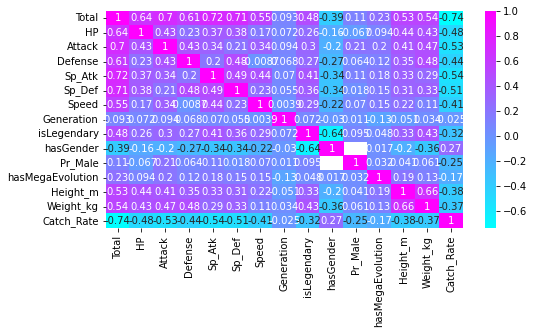

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True, cmap='cool')
plt.show()

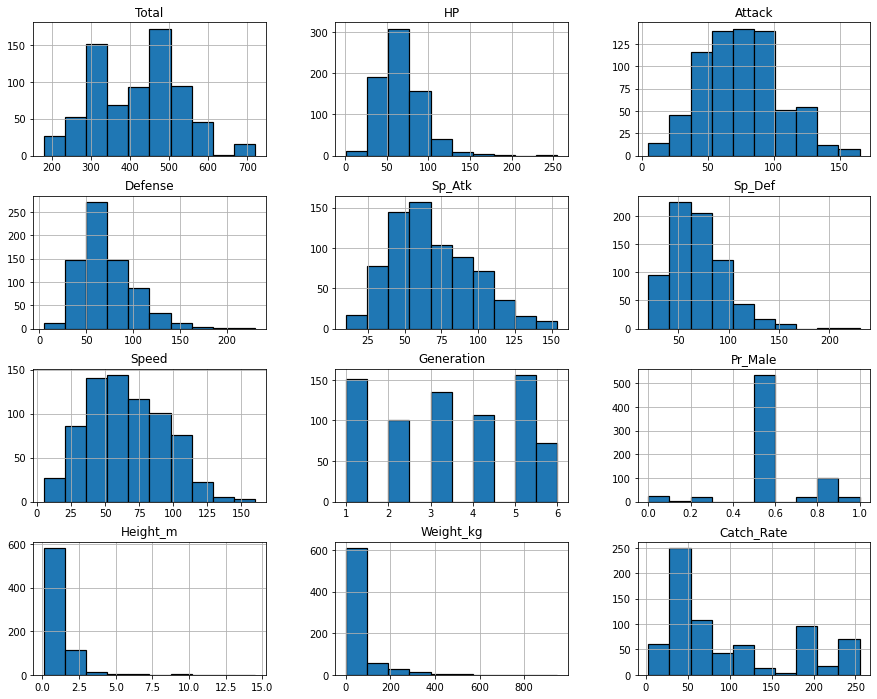

In [ ]:
df3.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(15,12)
plt.show()

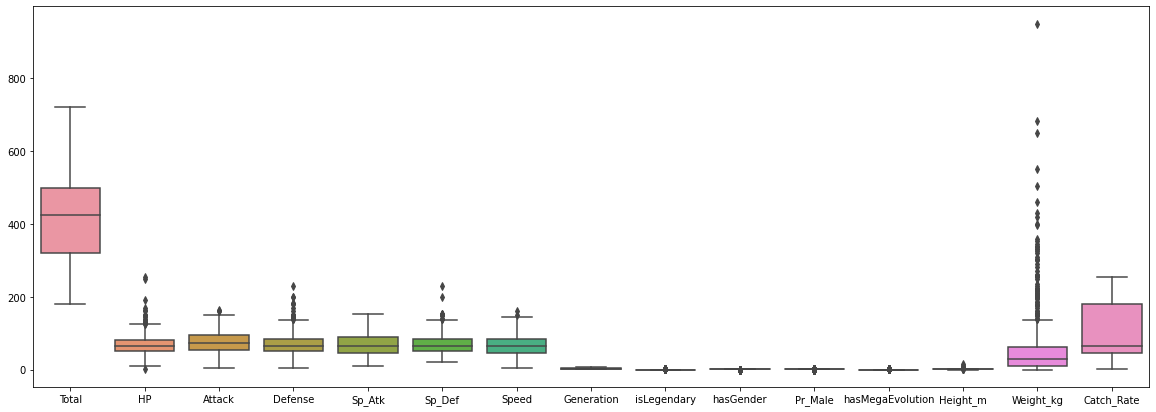

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df3)

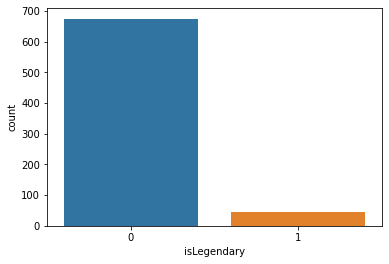

In [ ]:
#check keseimbangan target variabel
sns.countplot(x='isLegendary',data=df4)

In [ ]:
df.select_dtypes(include=["int64","float64"]).columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'Generation', 'Pr_Male', 'Height_m', 'Weight_kg', 'Catch_Rate'],
      dtype='object')

In [ ]:
#scaling data numerical 
cols_to_scale = ['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'Generation', 'Pr_Male', 'Height_m', 'Weight_kg', 'Catch_Rate']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df4[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
for column in df4:
  print(f'{column}: {df4[column].unique()}') 

Total: [0.25555556 0.41666667 0.63888889 0.23888889 0.65555556 0.24814815
 0.64814815 0.02777778 0.0462963  0.39814815 0.13148148 0.31296296
 0.5537037  0.13518519 0.43148148 0.15185185 0.48518519 0.2
 0.47777778 0.25925926 0.56481481 0.22222222 0.5        0.17592593
 0.34259259 0.60185185 0.17222222 0.26481481 0.56111111 0.22037037
 0.16666667 0.47222222 0.12037037 0.50925926 0.57407407 0.19444444
 0.23148148 0.15740741 0.2037037  0.48148148 0.59259259 0.31481481
 0.69444444 0.37962963 0.61111111 0.24074074 0.40740741 0.38888889
 0.28703704 0.62037037 0.58333333 0.42592593 0.25       0.26851852
 0.52777778 0.31851852 0.51851852 0.5462963  0.27407407 0.27777778
 0.55555556 0.62962963 0.4537037  0.2962963  0.30555556 0.21296296
 0.03703704 0.66666667 0.65740741 0.32407407 0.74074074 0.44444444
 0.77777778 0.92592593 0.06481481 0.43518519 0.12962963 0.07037037
 0.05555556 0.53703704 0.18518519 0.33333333 0.         0.46296296
 0.28888889 0.37037037 0.07407407 0.11111111 0.03333333 0.1814

##data procesing

In [ ]:
df4.dropna()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,...,Body_Style_head_base,Body_Style_head_legs,Body_Style_head_only,Body_Style_insectoid,Body_Style_multiple_bodies,Body_Style_quadruped,Body_Style_serpentine_body,Body_Style_several_limbs,Body_Style_two_wings,Body_Style_with_fins
0,0.255556,0.173228,0.27500,0.195556,0.381944,0.214286,0.258065,0.0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.416667,0.232283,0.35625,0.257778,0.486111,0.285714,0.354839,0.0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.638889,0.311024,0.48125,0.346667,0.625000,0.380952,0.483871,0.0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.238889,0.149606,0.29375,0.168889,0.347222,0.142857,0.387097,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.416667,0.224409,0.36875,0.235556,0.486111,0.214286,0.483871,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,0.925926,0.492126,0.78750,0.400000,0.840278,0.371429,0.606452,1.0,1,0,...,0,0,0,0,0,0,0,0,1,0
717,0.777778,0.421260,0.59375,0.515556,0.493056,0.357143,0.580645,1.0,1,0,...,0,0,0,0,0,0,1,0,0,0
718,0.777778,0.192913,0.59375,0.644444,0.625000,0.619048,0.290323,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
719,0.777778,0.311024,0.65625,0.244444,0.972222,0.523810,0.419355,1.0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
X = df4.loc[:, df4.columns !='isLegendary']
y = df4.loc[:, 'isLegendary']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#cek dimensi dari data yang sudah di split
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (576, 71)
X_test : (145, 71)
y_train : (576,)
y_test : (145,)


#modeling ANN

In [ ]:
X_train.shape

(576, 71)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model=Sequential()
#kita menggunakan 71 inpyt layer karena kolum pada data train ada 72
model.add(Dense(71, input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))

#sigmoid: output between 0 and 1
model.add(Dense(1,activation='sigmoid'))

###cek informasi model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 71)                5112      
                                                                 
 dense_1 (Dense)             (None, 10)                720       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5,843
Trainable params: 5,843
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.layers[0]

In [ ]:
#disini kita bisa melihat weight dari neuron pada layer 2

w,b = model.layers[1].get_weights()
print(w)
print(b)

[[ 0.03254426 -0.14279115 -0.02918838  0.01692176  0.03512868 -0.20975356
  -0.1261479   0.04859334  0.11291078 -0.04195841]
 [ 0.23710167 -0.13505927 -0.2346207   0.24239683  0.14979318  0.2009314
   0.14068285  0.26388282 -0.2487499   0.26907766]
 [ 0.23655468 -0.08563527 -0.18715528  0.12398443 -0.16608766 -0.06590126
   0.06017584  0.09917462  0.0112341  -0.13827668]
 [-0.11886621  0.03595829  0.19235393  0.26694232  0.09364685  0.08060881
   0.20078507  0.05799904 -0.09454653  0.14685711]
 [-0.20279048  0.02164161  0.12484062  0.03133163 -0.00755876  0.06891733
  -0.00404716 -0.21681625  0.01535702  0.0667451 ]
 [-0.00294209  0.23228776  0.00158745 -0.04754356  0.19884345  0.0998452
  -0.15724051  0.13335079 -0.0788624  -0.07407446]
 [-0.13473196  0.02644175  0.15203989  0.03046903 -0.15717985 -0.08725369
  -0.18568805  0.11463419  0.04925761  0.09928924]
 [-0.02226229  0.14636078 -0.06519197  0.00798458  0.21809715 -0.15632641
   0.00126496 -0.04794562 -0.03229327 -0.21711908]
 [

In [ ]:
#kita liat nama setiap layer yang kita punya
layer_names = list(map(lambda x: x.name,model.layers))
layer_names

['dense', 'dense_1', 'dense_2']

In [ ]:
#liat weight dari layer dense
model.get_layer('dense').get_weights()

[array([[ 0.20277734,  0.04982246,  0.06418855, ...,  0.02648023,
          0.05250992,  0.17778225],
        [-0.13044253,  0.12457488, -0.0354387 , ..., -0.16110858,
          0.14433683,  0.14245047],
        [-0.08696316,  0.20490824,  0.04471137, ...,  0.16447802,
          0.07280518, -0.01289444],
        ...,
        [ 0.1556315 ,  0.2010784 , -0.17560555, ...,  0.0454499 ,
          0.03429008,  0.03732464],
        [-0.17110236,  0.20014559, -0.02208093, ..., -0.02816804,
          0.1322098 , -0.07718508],
        [-0.0405795 , -0.13417439,  0.0718006 , ...,  0.070816  ,
          0.00543612, -0.12522069]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.], dtype=float32)]

###compiling model

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

###train model

In [ ]:
from keras.callbacks import History 
history = History()
History = model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=85, callbacks=[history])
#epoch adalah satu kali ANN kita melakukan forward dan backward propagations

Epoch 1/85
18/18 [==============================] - 3s 14ms/step - loss: 0.5935 - accuracy: 0.7847 - val_loss: 0.4700 - val_accuracy: 0.9103
Epoch 2/85
18/18 [==============================] - 0s 4ms/step - loss: 0.3352 - accuracy: 0.9427 - val_loss: 0.2801 - val_accuracy: 0.9103
Epoch 3/85
18/18 [==============================] - 0s 4ms/step - loss: 0.1925 - accuracy: 0.9427 - val_loss: 0.2175 - val_accuracy: 0.9103
Epoch 4/85
18/18 [==============================] - 0s 5ms/step - loss: 0.1417 - accuracy: 0.9427 - val_loss: 0.1714 - val_accuracy: 0.9103
Epoch 5/85
18/18 [==============================] - 0s 4ms/step - loss: 0.1040 - accuracy: 0.9514 - val_loss: 0.1247 - val_accuracy: 0.9448
Epoch 6/85
18/18 [==============================] - 0s 5ms/step - loss: 0.0748 - accuracy: 0.9792 - val_loss: 0.0921 - val_accuracy: 0.9724
Epoch 7/85
18/18 [==============================] - 0s 4ms/step - loss: 0.0537 - accuracy: 0.9913 - val_loss: 0.0747 - val_accuracy: 0.9793
Epoch 8/85
18/18 [=

### Visualizing Learning Curves

In [ ]:
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.593477,0.784722,0.470041,0.910345
1,0.335228,0.942708,0.280143,0.910345
2,0.192463,0.942708,0.217497,0.910345
3,0.141656,0.942708,0.171354,0.910345
4,0.103985,0.951389,0.124740,0.944828


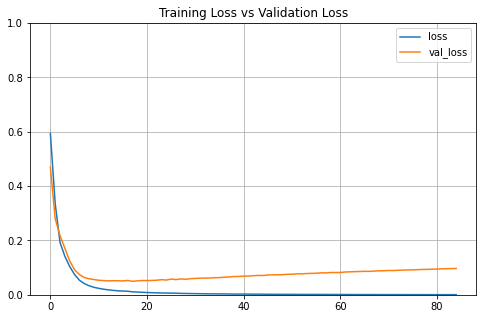

In [ ]:
df[['loss','val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Training Loss vs Validation Loss')
plt.show()

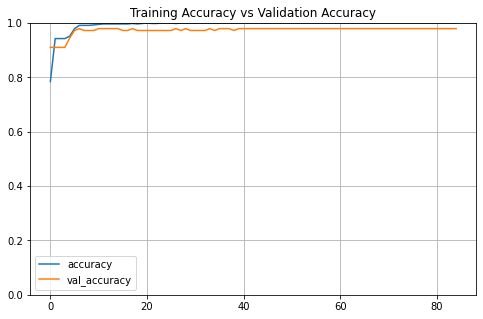

In [ ]:
df[['accuracy','val_accuracy']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1
plt.title('Training Accuracy vs Validation Accuracy')
plt.show()

### evaluasi model

In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.0969 - accuracy: 0.9793


[0.0969153419137001, 0.9793103337287903]

disini kita mendapat akurasi yang cukup bagus namun kita mendapat loss yang cukup jauh dari akurasi kemungkinan model kita overfitting/underfitting?

### gunakan model untuk melakukan prediksi

In [ ]:
#disini kita coba prediksi sebanyak 5 buah
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 71ms/step


array([[0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.97]], dtype=float32)